# MoodScriber : Data Challenge Contest


In [182]:
import pandas as pd
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,confusion_matrix

### DATASET CREATION [DONT EXECUTE FOLLOWING / DATASET IS ALREDY CREATED ]

In [2]:
# moods=['happy','sad','angry','depressed','depressed','rad','neutral','neutral','neutral','lonely','happy','happy']
# happy = ["good news","positive feedback","successful event","spending time with friends","getting a promotion",
#                 "new relationship","winning a game","vacation","achieving a goal","surprise gift"]
# sad= ["loss of a loved one","relationship breakup","job loss","disappointment","missing an event",
#               "hearing bad news","failure in a project","family argument","bad weather","illness",
#               "loneliness","moving away","conflict at work","missing ex","homesickness"]
# angry= ["traffic jam","missed deadline","noise disturbance","being late","mistake at work","rudeness","accusation","customer complaint","power outage",
#                 "unexpected cancellation","being ignored","inconsiderate behavior"]
# depressed= ["loss of a loved one","chronic illness","prolonged stress","feeling isolated",
#                     "traumatic event","career setback","failed relationship","financial difficulties",
#                     "persistent negative thoughts","self-doubt","personal failure"]
# rad= ["winning a prize","amazing experience","big achievement","amusement park","surprise party","traveling abroad","getting a new tattoo",
#               "major recognition","being part of an event","spontaneous fun","joining a flash mob"]
# neutral= ["routine day","stable environment","booring day","calm weather","completed chores","watching a movie","casual hobby","reading a book",
#                   "mild weather","relaxing weekend","simple meal"]
# lonely= ["living alone","friends moved away","feeling isolated",
#                  "working remotely","no social plans","disconnected from friends","long-distance relationships",
#                  "rejection","family moved away","new workplace","remote learning","absence of community"]
# days=['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']

### FETCHING THE REALTIME WEATHER DATA FROM API AND CATEGORIZING THE CODE WITH WEATHER

In [ ]:
# import requests
# url = "https://archive-api.open-meteo.com/v1/archive?latitude=12.55&longitude=77.33&start_date=2021-01-01&end_date=2024-05-03&daily=weather_code"
# response = requests.get(url)
# if response.status_code == 200:
#     weather_data = response.json()
# else:
#     print(response.status_code)
# date=weather_data['daily']['time'][:1000]
# weather=weather_data['daily']['weather_code']
# def categorize_weather(wmo_code):
#     sunny_codes = {0, 1, 2}
#     rainy_codes = {51, 53, 55, 56, 57, 61, 63, 65, 66, 67, 80, 81, 82}
#     cloudy_codes = {3, 45, 48, 95}
#     windy_codes = {96, 97}
#     if wmo_code in sunny_codes:
#         return "Sunny"
#     elif wmo_code in rainy_codes:
#         return "Rainy"
#     elif wmo_code in cloudy_codes:
#         return "Cloudy"
#     elif wmo_code in windy_codes:
#         return "Windy"
#     else:
#         return "Unknown"
# weatherdata=pd.DataFrame()
# weatherdata['DATE']=date
# weatherdata['DATE']=pd.to_datetime(weatherdata['DATE'])
# weatherdata['DAY']=weatherdata['DATE'].dt.day_name()
# weatherdata['WMO_CODE']=weather[:1000]
# weatherdata['WEATHER']=weatherdata['WMO_CODE'].apply(categorize_weather)

### FINAL STAGE OF CREATION [CONCATINATE WEATHER AND ACTIVITY/MOOD DATA]

In [202]:
# data=pd.DataFrame()
# np.random.seed(42)
# steps=np.random.normal(700,300, 1000).astype(int)
# sleep_mins=(steps * 0.04)+np.random.normal(450,30,1000).astype(int)
# m,a1,a2,d,w,s,sleepmin=[],[],[],[],[],[],[]
# for i in range(1000):
#     mood =random.choice(moods)
#     m.append(mood)
#     w.append(random.choice(weather))
#     d.append(days[i%7])
#     if mood=='happy':
#         a1.append(random.choice(happy+neutral))
#         a2.append(random.choice(happy+neutral))
#     elif mood=='sad':
#         a1.append(random.choice(sad+neutral))
#         a2.append(random.choice(sad+ neutral))
#     elif mood=='angry':
#         a1.append(random.choice(sad +angry))
#         a2.append(random.choice(sad+angry))
#     elif mood=='depressed':
#         a1.append(random.choice(sad+ depressed))
#         a2.append(random.choice(depressed+ angry))
#     elif mood=='rad':
#         a1.append(random.choice(rad +happy))
#         a2.append(random.choice(rad +neutral))
#     elif mood=='neutral':
#         a1.append(random.choice(neutral))
#         a2.append(random.choice(neutral))
#     else:
#         a1.append(random.choice(lonely+ sad))
#         a2.append(random.choice(lonely+neutral))
        
# date=[dt.date(2021, 1, 1)+ dt.timedelta(days=x) for x in range(1000)]
# data['DAY']=d
# data['DATE']=date
# data['MOOD']=m
# data['ACTIVITY_1']=a1
# data['ACTIVITY_2']=a2
# data["WEATHER"]=w
# data['STEPS_WALKED']=steps
# data['SLEEP_MINS']=sleep_mins
# data['SLEEP_HRS']=data["SLEEP_MINS"]/60
# data['SLEEP_HRS']=data['SLEEP_HRS'].round(1)
# data.to_excel('moodscriber.xlsx', index=False)


# data=pd.read_excel('moodscriber.xlsx')
# data=data.drop(columns=['DATE','WEATHER','DAY'])
# data=pd.concat([data, weatherdata], axis=1)
# data.to_excel('moodscriber.xlsx', index=False)


### LOADING DATASET


In [294]:
data=pd.read_excel('moodscriber.xlsx')
print(data.shape)
data.head()

(1000, 10)


,MOOD,ACTIVITY_1,ACTIVITY_2,STEPS_WALKED,SLEEP_MINS,SLEEP_HRS,DATE,DAY,WMO_CODE,WEATHER
0,sad,illness,missing an event,849,524.96,8.7,2021-01-01,Friday,3,Cloudy
1,sad,homesickness,casual hobby,658,503.32,8.4,2021-01-02,Saturday,51,Rainy
2,depressed,loss of a loved one,unexpected cancellation,894,486.76,8.1,2021-01-03,Sunday,61,Rainy
3,happy,positive feedback,good news,1156,476.24,7.9,2021-01-04,Monday,51,Rainy
4,sad,reading a book,job loss,629,495.16,8.3,2021-01-05,Tuesday,3,Cloudy


## WHATS THE MOST REPEATED ACTIVITY IN ACTIVITY-1 ??

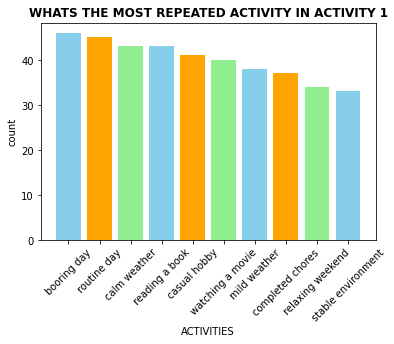

In [222]:
keys=data['ACTIVITY_1'].value_counts().keys()[:10]
values=data['ACTIVITY_1'].value_counts().values[:10]
plt.bar(keys,values,color=['skyblue','orange','lightgreen'])
plt.xticks(rotation=45)
plt.title('WHATS THE MOST REPEATED ACTIVITY IN ACTIVITY 1',fontsize=12,fontweight='bold')
plt.xlabel("ACTIVITIES")
plt.ylabel("count")
plt.show()

## WHATS THE MOST REPEATED ACTIVITY IN ACTIVITY-2 ??

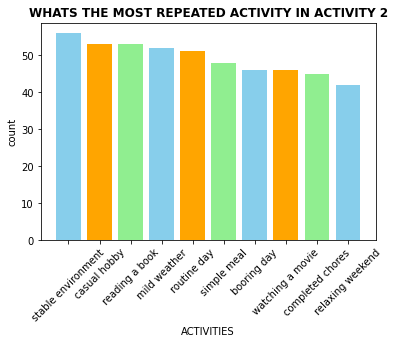

In [223]:
keys=data['ACTIVITY_2'].value_counts().keys()[:10]
values=data['ACTIVITY_2'].value_counts().values[:10]
plt.bar(keys,values,color=['skyblue','orange','lightgreen'])
plt.xticks(rotation=45)
plt.title('WHATS THE MOST REPEATED ACTIVITY IN ACTIVITY 2',fontsize=12,fontweight='bold')
plt.xlabel("ACTIVITIES")
plt.ylabel("count")
plt.show()

## WHATS AVG SLEEP TIME ??

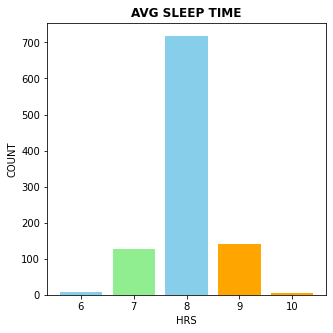

In [224]:
plt.figure(figsize=(5,5))
plt.bar(height=data['SLEEP_HRS'].round().value_counts(),x=data['SLEEP_HRS'].round().value_counts().keys(),color=['skyblue','orange','lightgreen'])
plt.title('AVG SLEEP TIME',fontsize=12,fontweight='bold')
plt.xlabel("HRS")
plt.ylabel("COUNT")
plt.show()

# HOW WAS HIS MOOD ALL THE TIME [AVG/COUNT] ??

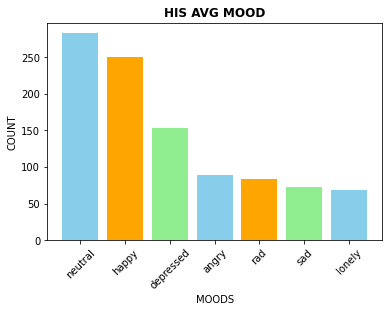

In [225]:
keys=data['MOOD'].value_counts().keys()
values=data['MOOD'].value_counts().values
plt.bar(keys,values,color=['skyblue','orange','lightgreen'])
plt.xticks(rotation=45)
plt.title('HIS AVG MOOD',fontsize=12,fontweight='bold')
plt.xlabel("MOODS")
plt.ylabel("COUNT")
plt.show()

## HOW MANY STEPS HE WALKS IN A DAY / WHATS THE AVG RANGE??

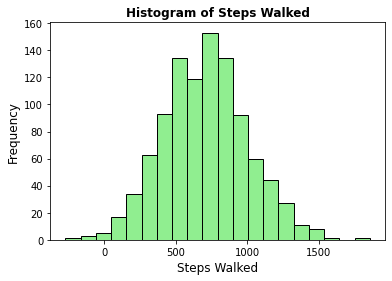

In [226]:
plt.hist(data['STEPS_WALKED'],bins=20,color='lightgreen',edgecolor='black')
plt.title('Histogram of Steps Walked',fontweight='bold') 
plt.xlabel('Steps Walked',fontsize=12)  
plt.ylabel('Frequency',fontsize=12)
plt.show()

# WHAT'S RELATION BETWEEN STEPS HE WALKED AND HIS SLEEP TIME ??

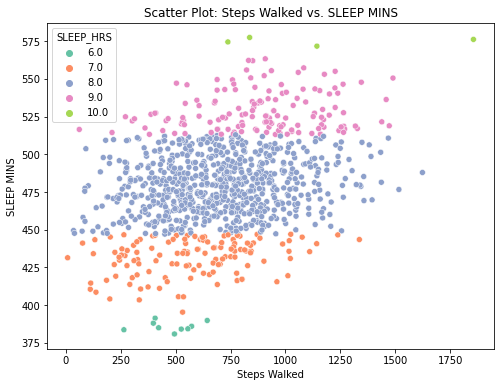

In [295]:
# Scatter plot of steps walked vs mood
plt.figure(figsize=(8, 6))
sns.scatterplot(x='STEPS_WALKED', y='SLEEP_MINS', data=data,hue=data['SLEEP_HRS'].round(), palette='Set2')
plt.title('Scatter Plot: Steps Walked vs. SLEEP MINS')
plt.xlabel('Steps Walked')
plt.ylabel('SLEEP MINS')
plt.show()
#[hue] for seperating the points based on hrs rather than mins

## STATISTICS OF STEPS WALKED IN THE DATASET


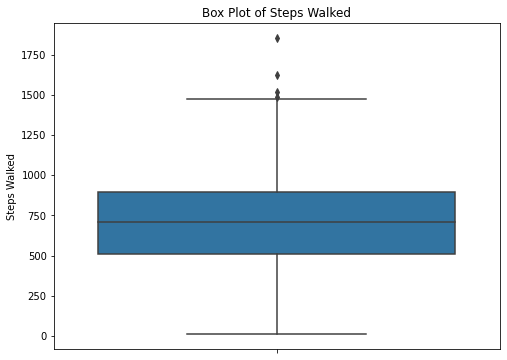

count    1000.00000
mean      708.98500
std       288.10885
min         9.00000
25%       507.50000
50%       708.00000
75%       894.25000
max      1855.00000
Name: STEPS_WALKED, dtype: float64


In [296]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='STEPS_WALKED', data=data)
plt.title('Box Plot of Steps Walked')
plt.ylabel('Steps Walked')
plt.show()
print(data['STEPS_WALKED'].describe())

## CONVERTING THE MOOD DATA TO NUMERICAL WEIGHTS FOR FURTHER EASY ANALYSIS

In [306]:
mood_weights ={'happy':4,'sad': -2,'angry':-3,'depressed':-5,'rad':5,'awful':-3,'neutral': 0,'lonely':-2}
data['MOOD_SCORE'] = data['MOOD'].map(mood_weights)
print(data['MOOD_SCORE'].isnull().sum())
data.head(5)

0


,MOOD,ACTIVITY_1,ACTIVITY_2,STEPS_WALKED,SLEEP_MINS,SLEEP_HRS,DATE,DAY,WMO_CODE,WEATHER,MOOD_SCORE
0,sad,illness,missing an event,849,524.96,8.7,2021-01-01,Friday,3,Cloudy,-2
1,sad,homesickness,casual hobby,658,503.32,8.4,2021-01-02,Saturday,51,Rainy,-2
2,depressed,loss of a loved one,unexpected cancellation,894,486.76,8.1,2021-01-03,Sunday,61,Rainy,-5
3,happy,positive feedback,good news,1156,476.24,7.9,2021-01-04,Monday,51,Rainy,4
4,sad,reading a book,job loss,629,495.16,8.3,2021-01-05,Tuesday,3,Cloudy,-2


## HOW IS HIS MOOD BASED ON WHAT WEATHER IT IS ?

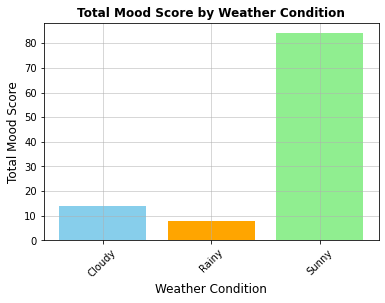

In [230]:
mood_score_weather=data.groupby('WEATHER')['MOOD_SCORE'].sum()
plt.bar(mood_score_weather.keys(),mood_score_weather.values,color=['skyblue','orange','lightgreen'])
plt.title('Total Mood Score by Weather Condition',fontweight='bold')
plt.xlabel('Weather Condition',fontsize=12)
plt.ylabel('Total Mood Score',fontsize=12)
plt.grid(True,linewidth=0.5)
plt.xticks(rotation=45) 
plt.show()

"HE WAS HAPPY WHEN ITS SUNNY OUTSIDE"

## HOWMUCH DID HE SLEEP IN PERTICULAR WEATHER ?

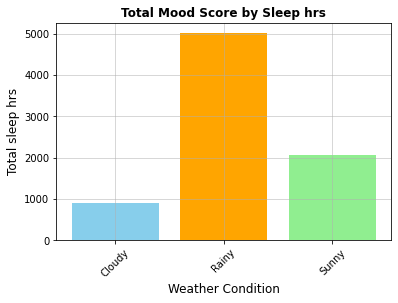

In [231]:
sleep_on_weather=data.groupby('WEATHER')['SLEEP_HRS'].sum()
plt.bar(sleep_on_weather.keys(), sleep_on_weather.values,color=['skyblue','orange','lightgreen'])
plt.title('Total Mood Score by Sleep hrs', fontweight='bold')
plt.xlabel('Weather Condition',fontsize=12)
plt.ylabel('Total sleep hrs',fontsize=12)
plt.grid(True,linewidth=0.5)
plt.xticks(rotation=45) 
plt.show()

"HE SLEPT PEACEFULLY WHEN IT WAS RAINING"

## HOW IS EACH ACTIVITY IN ACTIVITY1 RELATED TO HIS MOOD ?


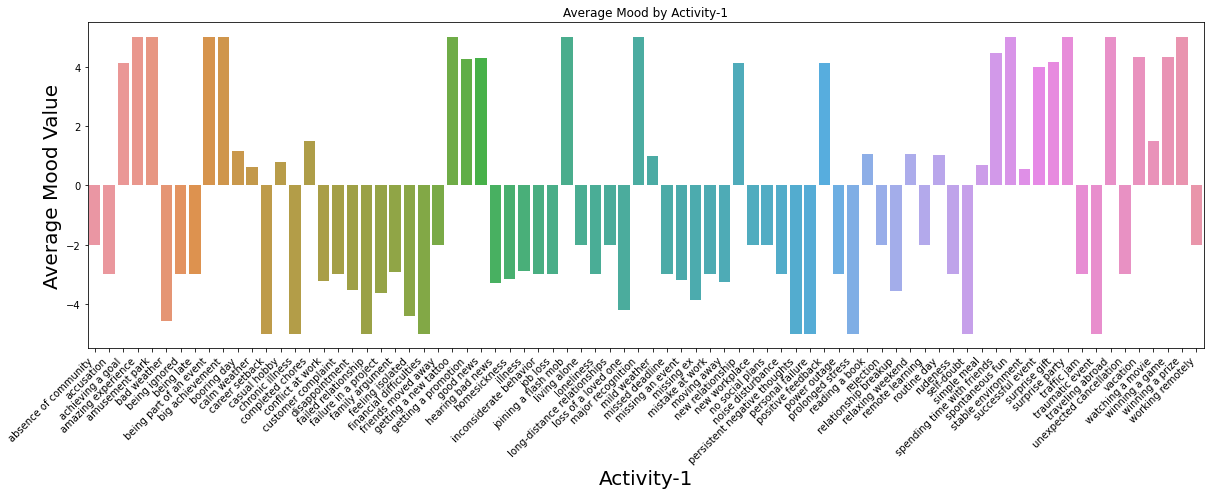

In [232]:
activity1_mood=data.groupby('ACTIVITY_1')['MOOD_SCORE'].mean()
activity2_mood=data.groupby('ACTIVITY_2')['MOOD_SCORE'].mean()
plt.figure(figsize=(20, 6))
sns.barplot(x=activity1_mood.index,y=activity1_mood.values)
plt.title('Average Mood by Activity-1')
plt.xlabel('Activity-1',fontsize=20)
plt.ylabel('Average Mood Value',fontsize=20)
plt.xticks(rotation=45, ha='right') 
plt.show()

## HOW IS EACH ACTIVITY IN ACTIVITY2 RELATED TO HIS MOOD ?

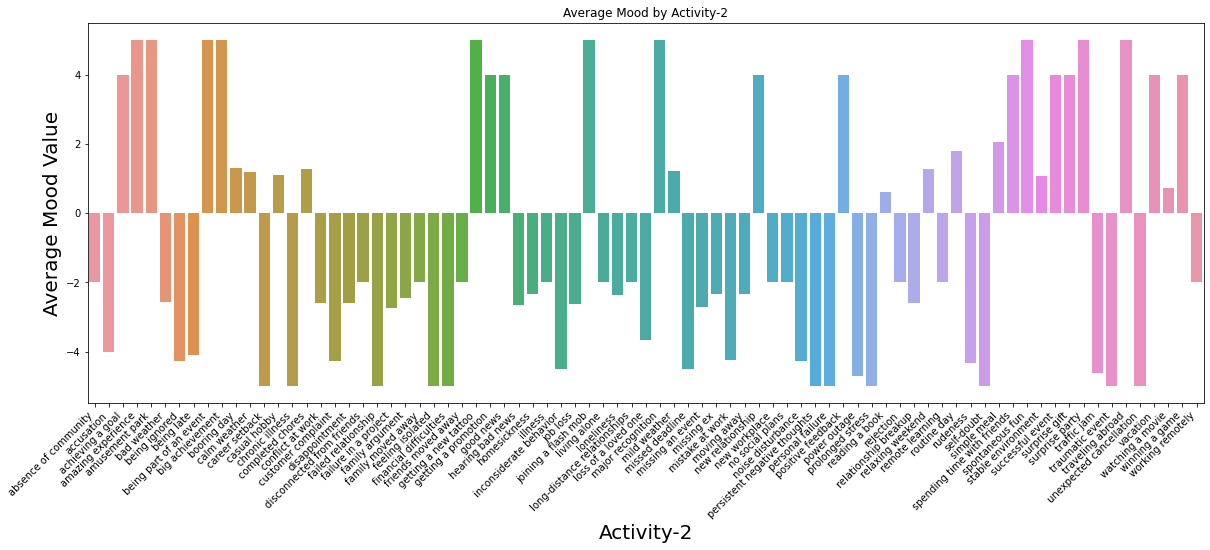

In [233]:
plt.figure(figsize=(20, 7))
sns.barplot(x=activity2_mood.index,y=activity2_mood.values,)
plt.title('Average Mood by Activity-2')
plt.xlabel('Activity-2',fontsize=20)
plt.ylabel('Average Mood Value',fontsize=20)
plt.xticks(rotation=45, ha='right') 
plt.show()

In [234]:
data.columns

Index(['MOOD', 'ACTIVITY_1', 'ACTIVITY_2', 'STEPS_WALKED', 'SLEEP_MINS',
       'SLEEP_HRS', 'DATE', 'DAY', 'WMO_CODE', 'WEATHER', 'MOOD_SCORE'],
      dtype='object')

## WHATS THE RELATION BETWEEN MOOD,STEPS AND SLEEP ?

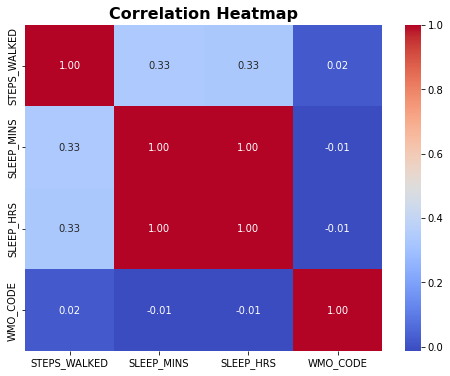

In [297]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt=".2f",)  
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold') 
plt.show()

"NOTHING MUCH LESS INSIGHTS"

## HOW IS HIS MOOD ON PERTICULAR WEEKDAY ?


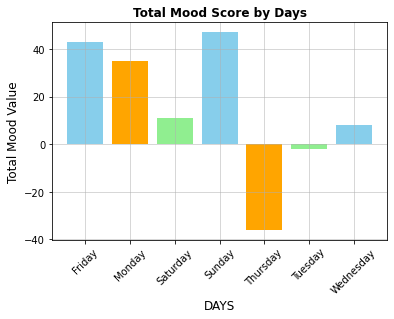

In [236]:
mood_on_day=data.groupby('DAY')['MOOD_SCORE'].sum()
plt.bar(mood_on_day.keys(),mood_on_day.values,color=['skyblue','orange','lightgreen'])
plt.title('Total Mood Score by Days', fontweight='bold')
plt.xlabel('DAYS',fontsize=12)
plt.ylabel('Total Mood Value',fontsize=12)
plt.grid(True,linewidth=0.5)
plt.xticks(rotation=45) 
plt.show()

""" HE HATES THRUSDAYS """

## HOW IS HIS SLEEP ON PERTICULAR WEEKDAY?

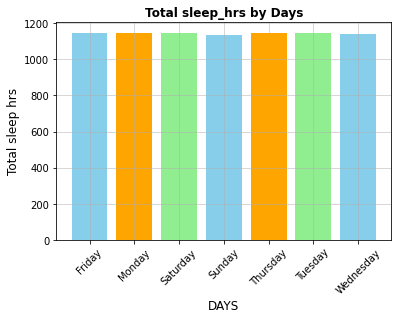

In [237]:
mood_on_day=data.groupby('DAY')['SLEEP_HRS'].sum()
plt.bar(mood_on_day.keys(),mood_on_day.values,color=['skyblue','orange','lightgreen'])
plt.title('Total sleep_hrs by Days', fontweight='bold')
plt.xlabel('DAYS',fontsize=12)
plt.ylabel('Total sleep hrs',fontsize=12)
plt.grid(True,linewidth=0.5)
plt.xticks(rotation=45) 
plt.show()

In [238]:
data.columns

Index(['MOOD', 'ACTIVITY_1', 'ACTIVITY_2', 'STEPS_WALKED', 'SLEEP_MINS',
       'SLEEP_HRS', 'DATE', 'DAY', 'WMO_CODE', 'WEATHER', 'MOOD_SCORE'],
      dtype='object')

## CALSSIFY THE MOOD BASED ON ACTIVITIES AND WHEN NEW ACTIVITY IS GIVEN TELL PREDICT MOOD

Accuracy: 0.83


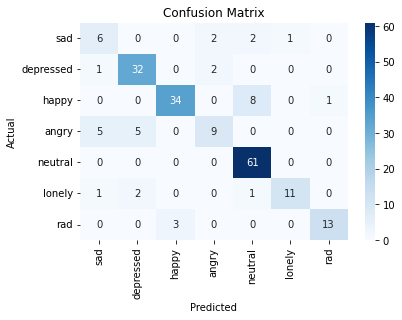

              precision    recall  f1-score   support

       angry       0.69      0.47      0.56        19
   depressed       0.82      0.91      0.86        35
       happy       0.92      0.79      0.85        43
      lonely       0.92      0.73      0.81        15
     neutral       0.85      1.00      0.92        61
         rad       0.93      0.81      0.87        16
         sad       0.46      0.55      0.50        11

    accuracy                           0.83       200
   macro avg       0.80      0.75      0.77       200
weighted avg       0.83      0.83      0.83       200

##############################################################
Predictions for New Data:
          ACTIVITY_1        ACTIVITY_2
0       routine day   big achievement
1  watching a movie     surprise gift
2      mild weather  achieving a goal


 ['neutral' 'happy' 'happy']
##############################################################


In [239]:
import warnings
warnings.filterwarnings("ignore")

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_activities = encoder.fit_transform(data[['ACTIVITY_1', 'ACTIVITY_2']])

encoded_df=pd.DataFrame(encoded_activities, columns=encoder.get_feature_names_out(['ACTIVITY_1', 'ACTIVITY_2']))
df = pd.concat([data, encoded_df], axis=1)

y = df['MOOD']
x = df[encoded_df.columns]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
cm = confusion_matrix(ytest, ypred, labels=df['MOOD'].unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=df['MOOD'].unique(), yticklabels=df['MOOD'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(ytest, ypred))
new_data = {
    'ACTIVITY_1': ['routine day', 'watching a movie','mild weather'],
    'ACTIVITY_2': ['big achievement', 'surprise gift','achieving a goal']
}
df_new = pd.DataFrame(new_data)
encoded_new = encoder.transform(df_new[['ACTIVITY_1', 'ACTIVITY_2']])
ypred_new = model.predict(encoded_new)
print("##############################################################")
print("Predictions for New Data:\n",df_new)
print('\n\n',ypred_new)
print("##############################################################")

USEFULL WHEN USER PRESS WRONG MOOD BY MISTAKE,  AND WE CAN PREDICT HIS MOOD

## CROSSTAB BETWEEN MOOD AND ACTIVITIES

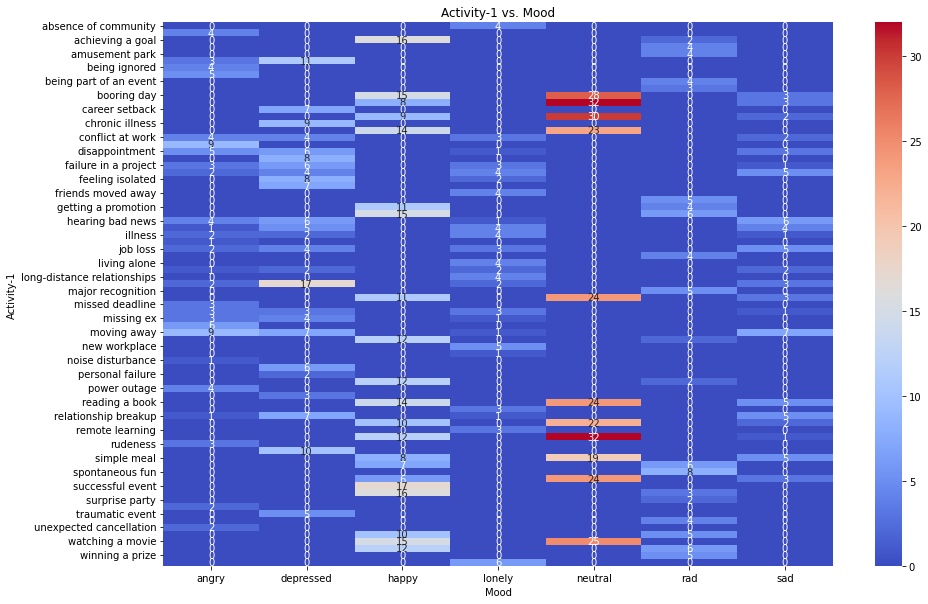

In [240]:
activity_mood_corr = pd.crosstab(data['ACTIVITY_1'], data['MOOD'])
plt.figure(figsize=(15, 10))
sns.heatmap(activity_mood_corr, annot=True, cmap='coolwarm', fmt='d')  # Crosstab heatmap to show counts
plt.title('Activity-1 vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Activity-1')
plt.show()

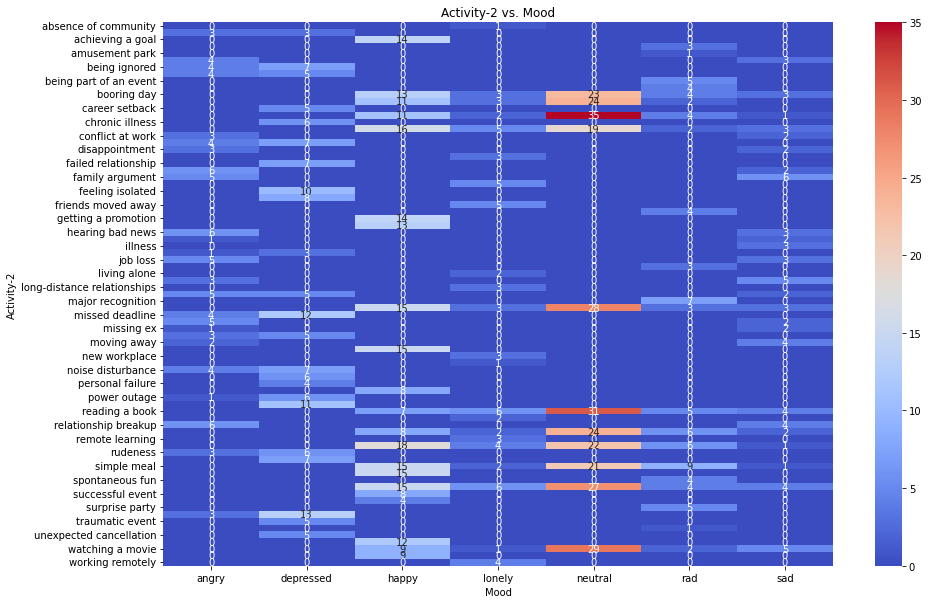

In [241]:
activity_mood_corr = pd.crosstab(data['ACTIVITY_2'], data['MOOD'])
plt.figure(figsize=(15, 10))
sns.heatmap(activity_mood_corr, annot=True, cmap='coolwarm', fmt='d')  # Crosstab heatmap to show counts
plt.title('Activity-2 vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Activity-2')
plt.show()

## ACTIVITY1,2 TRENDS OVER TIME IN DATASET BASED ON MOODS

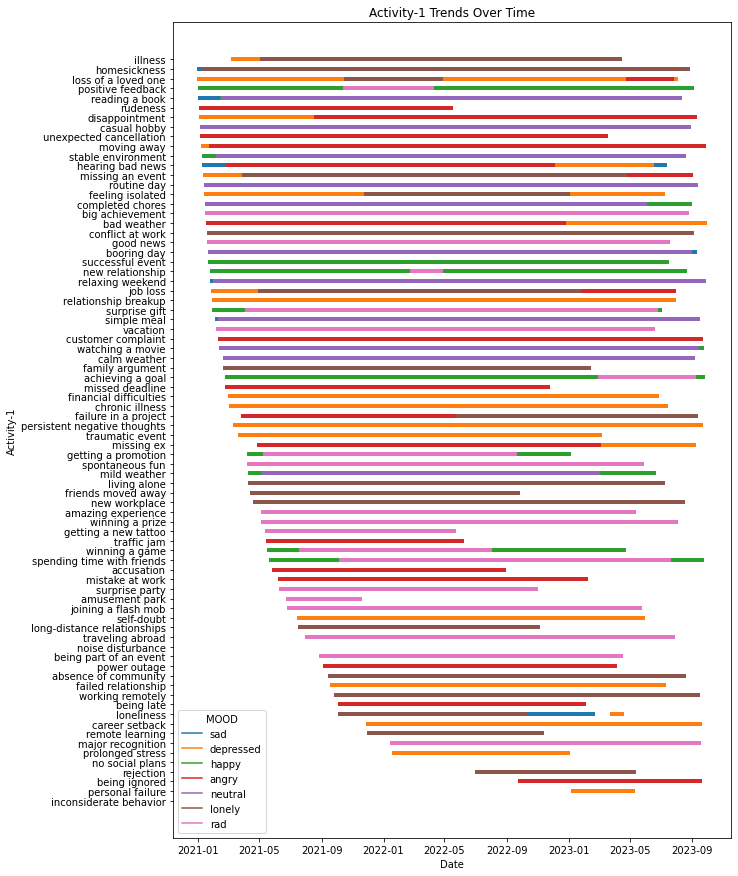

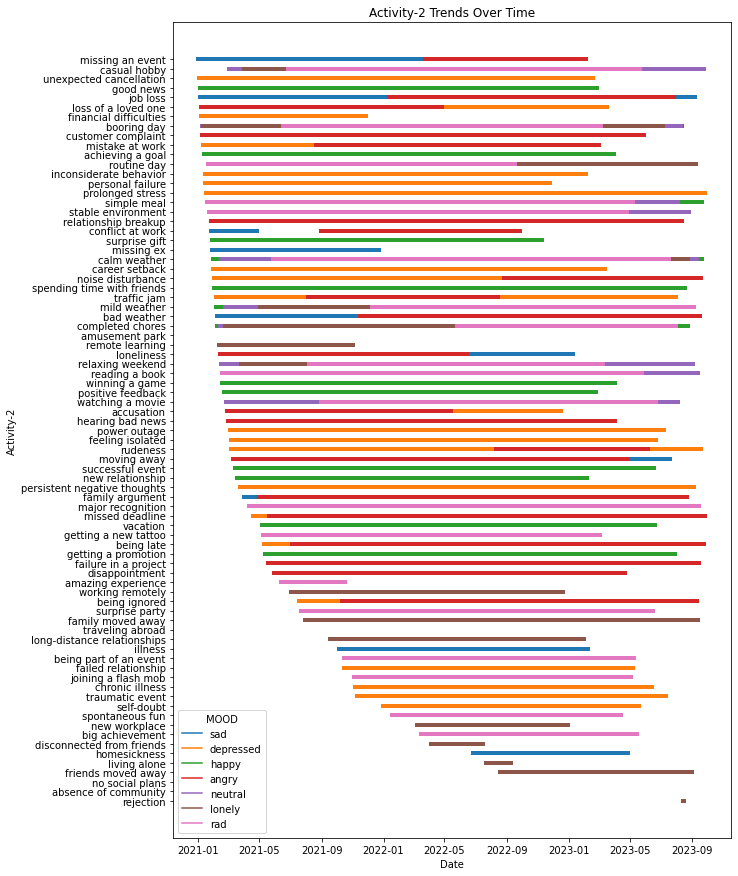

In [242]:
### Activity Trends Over Time
# Ploting the frequency of each activity over time
plt.figure(figsize=(10, 15))
sns.lineplot(x='DATE', y='ACTIVITY_1', data=data, hue='MOOD',estimator=None,units='ACTIVITY_1', lw=4,legend=True)
plt.title('Activity-1 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Activity-1')
plt.show()
plt.figure(figsize=(10, 15))
sns.lineplot(x='DATE', y='ACTIVITY_2', data=data, hue='MOOD',estimator=None,units='ACTIVITY_2',legend=True, lw=4)
plt.title('Activity-2 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Activity-2')
plt.show()

''' THIS PLOTS SHOWS TRENDS OF PERTICULAR ACTIVITIES HOW IT IS OVER TIME AND ALSO DISPLAYING THE MOOD TOGETHER IN SIMPLE WORDS IT SAYS HOW OFTEN HE DOSE THAT ACTIVITY AND WHATS HIS MOOD ''''

## HOW IS HIS MOODS BASED ON WEATHER?


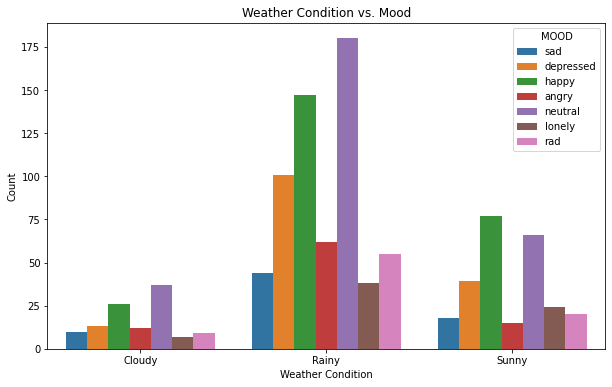

In [243]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WEATHER', hue='MOOD', data=df) 
plt.title('Weather Condition vs. Mood')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()


## HOW MUCH HE WALKS ON PERTICULAR WEATHER [STATS]

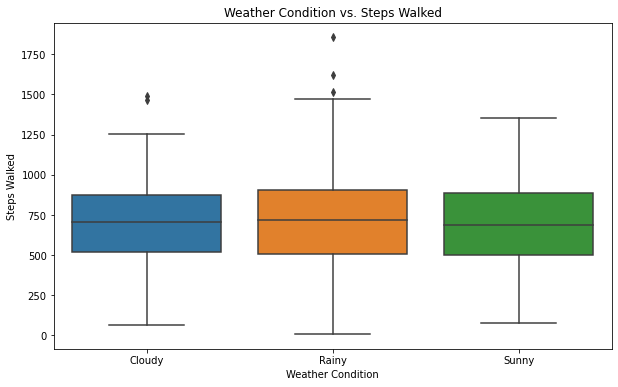

In [304]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='WEATHER', y='STEPS_WALKED', data=data)  # Steps walked by weather
plt.title('Weather Condition vs. Steps Walked')
plt.xlabel('Weather Condition')
plt.ylabel('Steps Walked')
plt.show()

## PLOT FOR STEPS HE WALKED OVERTIME WITH THE WEATHER CONDITION

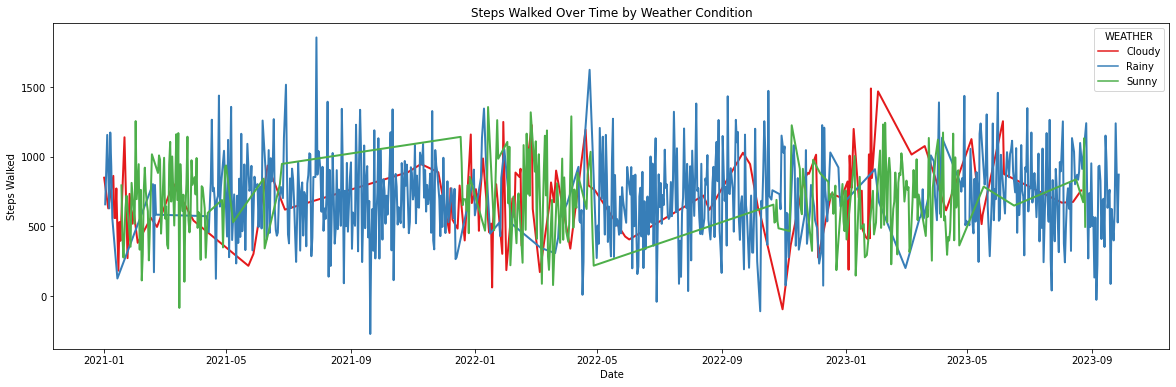

In [249]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='DATE', y='STEPS_WALKED', data=df, hue='WEATHER', palette='Set1', lw=2) 
plt.title('Steps Walked Over Time by Weather Condition')
plt.xlabel('Date')
plt.ylabel('Steps Walked')
plt.show()

## WHAT ACTIVITIES HE DOSE IN POSITIVE MODE ?

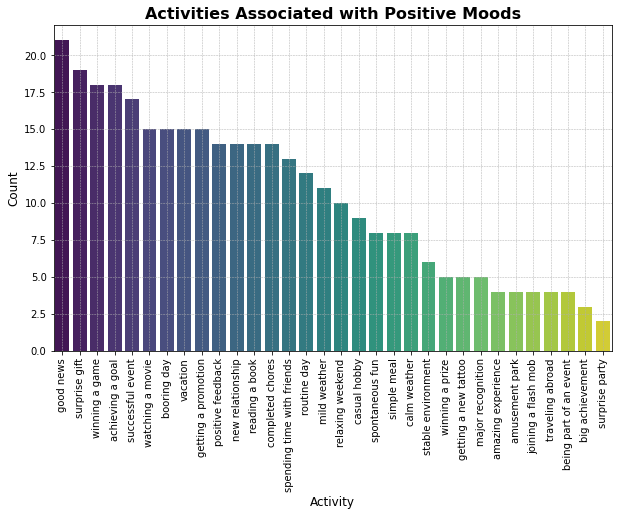

Recommended Activities for Positive Moods:

['good news', 'surprise gift', 'winning a game', 'achieving a goal', 'successful event', 'watching a movie', 'booring day', 'vacation', 'getting a promotion', 'positive feedback', 'new relationship', 'reading a book', 'completed chores', 'spending time with friends', 'routine day', 'mild weather', 'relaxing weekend', 'casual hobby', 'spontaneous fun', 'simple meal', 'calm weather', 'stable environment', 'winning a prize', 'getting a new tattoo', 'major recognition', 'amazing experience', 'amusement park', 'joining a flash mob', 'traveling abroad', 'being part of an event', 'big achievement', 'surprise party']


In [250]:
df=data[(data['MOOD'] == 'happy') | (data['MOOD'] == 'rad')]

activity_counts = df['ACTIVITY_1'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=activity_counts.index,y=activity_counts.values,palette='viridis')
plt.title('Activities Associated with Positive Moods',fontsize=16,fontweight='bold')
plt.xlabel('Activity',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=12)
plt.grid(True,linestyle='--',linewidth=0.5)
plt.show()

recommended_activities = activity_counts.index.tolist()
print("Recommended Activities for Positive Moods:\n")
print(recommended_activities)

"USEFULL TO RECOMEND THESE ACTIVITIES WHEN THE USER IS IN NEGATIVE MOOD"

### Experiment with a Random Forest model to see if accuracy increases

Accuracy: 0.73


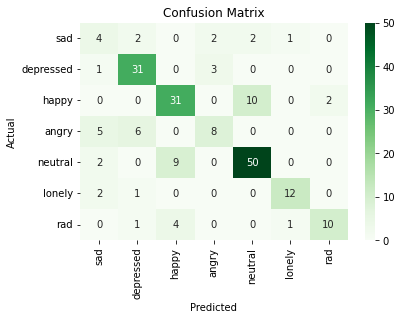

              precision    recall  f1-score   support

       angry       0.62      0.42      0.50        19
   depressed       0.76      0.89      0.82        35
       happy       0.70      0.72      0.71        43
      lonely       0.86      0.80      0.83        15
     neutral       0.81      0.82      0.81        61
         rad       0.83      0.62      0.71        16
         sad       0.29      0.36      0.32        11

    accuracy                           0.73       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.73      0.73      0.73       200



In [263]:
from sklearn.ensemble import RandomForestClassifier

encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoded_activities=encoder.fit_transform(data[['ACTIVITY_1','ACTIVITY_2']])
encoded_data =pd.DataFrame(encoded_activities,columns=encoder.get_feature_names_out(['ACTIVITY_1','ACTIVITY_2']))

df = pd.concat([data,encoded_data],axis=1)
y=df['MOOD']
x =df[encoded_data.columns]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Experiment with a Random Forest model for better accuracy
model =RandomForestClassifier() 
model.fit(xtrain,ytrain)

ypred= model.predict(xtest)

accuracy=accuracy_score(ytest,ypred)

print("Accuracy:",accuracy)

cm = confusion_matrix(ytest,ypred,labels=data['MOOD'].unique())
sns.heatmap(cm,annot=True,cmap='Greens', fmt='d',xticklabels=data['MOOD'].unique(),yticklabels=data['MOOD'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(ytest,ypred))

## PAIR PLOT FOR STEPS,SLEEP BASED ON HIS MOOD SCORE

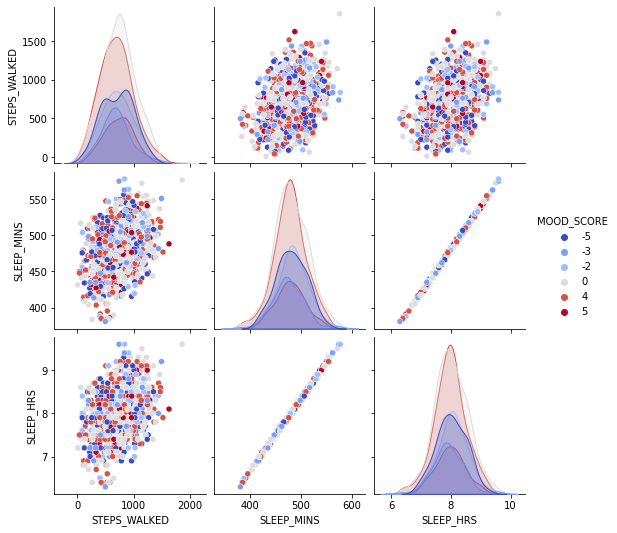

In [307]:
sns.pairplot(data[['STEPS_WALKED', 'SLEEP_MINS', 'SLEEP_HRS', 'MOOD_SCORE']],hue='MOOD_SCORE',palette='coolwarm')
plt.show()

"INSIGHT: BY THIS PLOT WE CAN SEE THAT THE USER SLEEPS LESS AND WALK LESS WHEN HE IS DEPRESSED OR SAD AND WALKS MORE AND SLEEPS MORE WHEN HE IS ACTIVE OR IN POSITIVE MOOD "

### FANCY PLOT SIMILAR TO BOX PLOT TO SEE DISTRIBUTION OF STEPS ON WEATHER

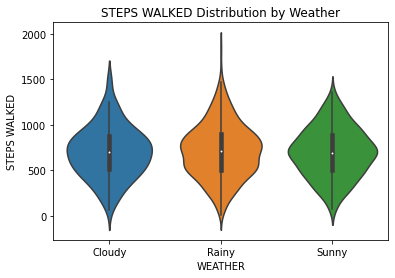

In [308]:
sns.violinplot(x='WEATHER', y='STEPS_WALKED', data=data)
plt.title('STEPS WALKED Distribution by Weather')
plt.xlabel('WEATHER')
plt.ylabel('STEPS WALKED')
plt.show()


The shape and width of each violin show how STEPS is distributed for different weather conditions.


## IS WEATHER RELATED TO MOOD?

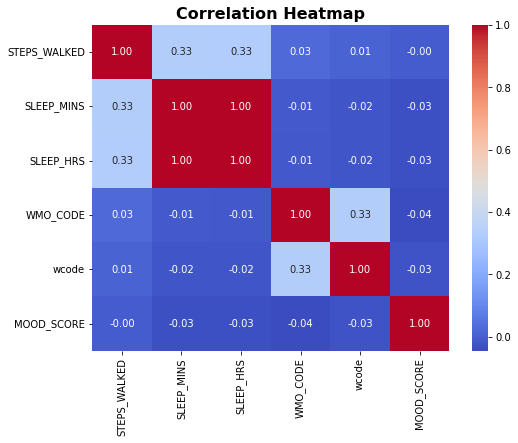

In [290]:
weather_mapping = {'Sunny':1,'Rainy':2,'Cloudy':3}
data['wcode']=data['WEATHER'].map(weather_mapping)
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt=".2f",)  
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold') 
plt.show()

"unfortunately this is not real data and there is no realtion between mood and weather data for this random generated dataset instance but as we see there is correlation between the sleephrs and steps walked by 0.3/30% "